In [1]:
import pandas as pd
# reading pre-formatted dataset
X_train = pd.read_csv("../training_datasets/base_train.csv") 
X_train = X_train.drop(columns=['Unnamed: 0'])

df_diagnosis = pd.read_csv("../training_datasets/base_train_answer.csv") 
df_diagnosis = df_diagnosis.drop(columns=['Unnamed: 0'])
y_train = df_diagnosis['diagnosis'].ravel()

# joining info and diagnosis into one df
df_full = pd.concat([df_diagnosis, X_train], axis=1)
df_full.head()

print(df_full.head())

print(X_train.shape)
print(y_train.shape)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      good        10.26         14.71           66.20      321.6   
1      good        12.43         17.00           78.60      477.3   
2       bad        17.20         24.52          114.20      929.4   
3      good        14.26         18.17           91.22      633.1   
4      good         7.76         24.54           47.92      181.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09882           0.09159         0.03581              0.02037   
1          0.07557           0.03454         0.01342              0.01699   
2          0.10710           0.18300         0.16920              0.07944   
3          0.06576           0.05220         0.02475              0.01374   
4          0.05263           0.04362         0.00000              0.00000   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1633  ...        10.880          19.48 

In [2]:
# normalizing test dataframe

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train), 
        index=X_train.index, 
        columns=X_train.columns
    )

print(X_train_scaled.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.155190      0.169090        0.154861   0.075546         0.416990   
1     0.257892      0.246534        0.240550   0.141591         0.207096   
2     0.483648      0.500845        0.486559   0.333362         0.491740   
3     0.344503      0.286101        0.327759   0.207678         0.118534   
4     0.036869      0.501522        0.028540   0.015907         0.000000   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.221489        0.083903             0.101243       0.289394   
1          0.046500        0.031443             0.084443       0.208081   
2          0.501871        0.396439             0.394831       0.437879   
3          0.100669        0.057990             0.068290       0.290404   
4          0.074351        0.000000             0.000000       0.266162   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

Best estimator: 2
    estimators     score
0          1.0  0.902821
1          2.0  0.923205
2          3.0  0.897821
3          4.0  0.902949
4          5.0  0.897821
5          6.0  0.902949
6          7.0  0.897821
7          8.0  0.907949
8          9.0  0.887564
9         10.0  0.892692
10        11.0  0.882436
11        12.0  0.892564
12        13.0  0.882436
13        14.0  0.887436
14        15.0  0.882308
15        16.0  0.882308
16        17.0  0.877308
17        18.0  0.882436
18        19.0  0.867051
19        20.0  0.872179
20        21.0  0.861923
21        22.0  0.872179
22        23.0  0.856795
23        24.0  0.861923
24        25.0  0.851667
25        26.0  0.856795
26        27.0  0.846667
27        28.0  0.851667
28        29.0  0.846667
29        30.0  0.851667
30        31.0  0.846538
31        32.0  0.851667
32        33.0  0.836410
33        34.0  0.851667
34        35.0  0.846538
35        36.0  0.851667
36        37.0  0.846538
37        38.0  0.846538
38     

<AxesSubplot:xlabel='estimators', ylabel='score'>

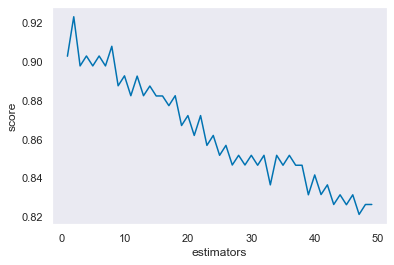

In [3]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
result = []
best_score = 0
best_estimator = 0

for i in range(1, 50):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train, y_train)
    s = make_scorer(recall_score, pos_label='bad')
    scores = cross_val_score(modelK, X_train, y_train, cv=5, scoring=s)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )
# best and smallest number of estimators using above loop was 12

In [4]:
modelK = KNeighborsClassifier(n_neighbors=12)
modelK.fit(X_train_scaled, y_train)
s = make_scorer(recall_score, pos_label='bad')
scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train_scaled, y_train, cv=5)
print("recall_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

# recall_score = 0.9737
# KNN with hyper [n_estimators]

recall_score: 0.93346 (+/- 0.06205)


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[183  13]
 [  4 312]]
              precision    recall  f1-score   support

         bad       0.98      0.93      0.96       196
        good       0.96      0.99      0.97       316

    accuracy                           0.97       512
   macro avg       0.97      0.96      0.96       512
weighted avg       0.97      0.97      0.97       512

